<a href="https://colab.research.google.com/github/harshjoshi23/duedateprediction/blob/main/Prediction_duedate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading File

df = pd.read_csv("1830009.csv")

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200782001,GORDO trust,2019-04-17 00:00:00,2019.0,1.929081e+09,2019-04-04,20190404,20190404,20190419.0,USD,RV,1.0,NaN,20157.40,20190404.0,NAA8,1.929081e+09,0
1,U001,0200769623,WAL-MAR systems,2019-01-22 00:00:00,2019.0,1.928609e+09,2019-01-11,20190111,20190111,20190126.0,USD,RV,1.0,NaN,71.11,20190111.0,NAH4,1.928609e+09,0
2,U001,0200762301,C&S WH co,2019-04-26 00:00:00,2019.0,1.929128e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,5624.96,20190412.0,NAC6,1.929128e+09,0
3,U001,0200769623,WAL-MAR associates,2019-12-11 00:00:00,2019.0,1.930206e+09,2019-11-30,20191130,20191130,20191215.0,USD,RV,1.0,NaN,13467.99,20191130.0,NAH4,1.930206e+09,0
4,U001,0200761734,H E BUT corporation,2019-06-27 00:00:00,2019.0,1.929486e+09,2019-06-13,20190613,20190613,20190628.0,USD,RV,1.0,NaN,74716.83,20190613.0,NAA8,1.929486e+09,0


#### Converting Date from object type to datetime type



In [ ]:
# Converting Date from object type to datetime type
# We could have done this step in Pre-processing. But since we have to sort our data according to date for splitting, we are doing it earlier.

df['clear_date']= pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45627 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [ ]:
# Sorting according to document_create_date.1

df = df.sort_values(by="document_create_date.1")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
27305,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,8494.34,2018-12-30,NAH4,1.928541e+09,0
25048,U001,0200780383,MEIJ foundation,2019-01-18,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,80237.74,2018-12-30,NAA8,1.928544e+09,0
19368,U001,0200711029,WEGMAN foundation,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,16626.31,2018-12-30,NAA8,1.928543e+09,0
42391,U001,0200799538,UNITE llc,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,97366.37,2018-12-30,NAA8,1.928543e+09,0
39761,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,8406.56,2018-12-30,NAH4,1.928541e+09,0


# Splitting of dataset

In [ ]:
Test = df[df['clear_date'].isnull()]
Rest = df[df['clear_date'].notnull()]
Test.shape

# So here basically we are dividing the data set into Test And Rest, where all clear_date columns having NULL goes into Test and the rest into Rest.

(4373, 19)

In [ ]:
Test.shape

(4373, 19)

In [ ]:
from sklearn.model_selection import train_test_split   
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Now using the sklearn train_test_split, we will splitt the Rest dataset into Train Set , Validation Set and Local test Set.

train,val = train_test_split(Rest,shuffle=False,test_size=0.3)

In [ ]:
val1,local_test = train_test_split(val,shuffle=False,test_size=0.5)

# So we have 4 datasets now. train(70% of Rest dataset), val1(15% of Rest dataset), local_test(Again 15% of Rest dataset) and finally our Test Set(with all null values in clear_date which the model has to finally predict)

### Representation of 4 datasets(Test, train, val1, local_test)

In [ ]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46639,U001,0200794332,COST systems,NaT,2020.0,1.930565e+09,2020-02-27,2020-02-24,2020-02-27,2020-03-13,USD,RV,1.0,NaN,9872.03,2020-02-27,NAAX,1.930565e+09,1
46688,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,NaN,29400.46,2020-02-27,NAH4,1.930574e+09,1
49351,CA02,0140104440,SO llc,NaT,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,RV,1.0,NaN,125849.28,2020-02-28,CA10,2.960617e+09,1
46721,CA02,0140104440,SO trust,NaT,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-17,CAD,RV,1.0,NaN,65058.62,2020-03-07,CA10,2.960617e+09,1
46746,U001,0200783609,PROFIC foundation,NaT,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,NaN,18716.92,2020-02-27,NAA8,1.930571e+09,1


In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
27305,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,8494.34,2018-12-30,NAH4,1.928541e+09,0
25048,U001,0200780383,MEIJ foundation,2019-01-18,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,80237.74,2018-12-30,NAA8,1.928544e+09,0
19368,U001,0200711029,WEGMAN foundation,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,16626.31,2018-12-30,NAA8,1.928543e+09,0
42391,U001,0200799538,UNITE llc,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,97366.37,2018-12-30,NAA8,1.928543e+09,0
39761,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,8406.56,2018-12-30,NAH4,1.928541e+09,0


In [ ]:
val1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1294,U001,0200936373,SUPE co,2019-10-23,2019.0,1.929982e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,NaN,7787.03,2019-10-08,NAA8,1.929982e+09,0
45293,U001,0200769623,WAL-MAR,2019-10-18,2019.0,1.929975e+09,2019-10-08,2019-10-06,2019-10-08,2019-10-23,USD,RV,1.0,NaN,35514.19,2019-10-08,NAH4,1.929975e+09,0
2688,U001,0200875006,KROGER llc,2019-10-23,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,NaN,42706.90,2019-10-08,NAA8,1.929983e+09,0
8901,CA02,0140105678,SAPUTO,2019-10-24,2019.0,2.960584e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-20,CAD,RV,1.0,NaN,17860.02,2019-10-10,CA10,2.960584e+09,0
28082,U001,0200765011,MAINES co,2019-11-12,2019.0,1.929984e+09,2019-10-08,2019-10-08,2019-10-08,2019-11-09,USD,RV,1.0,NaN,33912.89,2019-10-08,NA32,1.929984e+09,0


In [ ]:
local_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4617,U001,0200763814,SYSCO F corp,2019-12-26,2019.0,1.930255e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,26574.90,2019-12-09,NAA8,1.930255e+09,0
37302,CA02,0140104409,LOB trust,2019-12-20,2019.0,2.960599e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-20,CAD,RV,1.0,NaN,124303.02,2019-12-10,CA10,2.960599e+09,0
21087,U001,0200771157,WEIS co,2019-12-26,2019.0,1.930256e+09,2019-12-09,2019-12-10,2019-12-09,2019-12-24,USD,RV,1.0,NaN,45543.52,2019-12-09,NAA8,1.930256e+09,0
36978,U001,0200769623,WAL-MAR systems,2019-12-19,2019.0,1.930254e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,69495.26,2019-12-09,NAH4,1.930254e+09,0
30547,U001,0200792734,MDV/ associates,2019-12-23,2019.0,1.930250e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,81224.88,2019-12-09,NAA8,1.930250e+09,0


# Preprocessing

#### Creating our Target column

In [ ]:
train['Target_days'] = train['clear_date'].sub(train['due_in_date'], axis=0).dt.days
val1['Target_days'] = val1['clear_date'].sub(val1['due_in_date'], axis=0).dt.days
local_test['Target_days'] = local_test['clear_date'].sub(local_test['due_in_date'], axis=0).dt.days
Test['Target_days'] = Test['clear_date'].sub(Test['due_in_date'], axis=0).dt.days
## Subracting Due date from Clear date give the number of days extended for paying the amount.

In [ ]:
train.shape

(31938, 20)

#### Checking for Null Columns

In [ ]:
# Checking for columns with all values null in it.

[col for col in train.columns if train[col].isnull().sum()==len(train.index)] 

['area_business']

In [ ]:
# Checking for number of null values in a column

df.isnull().sum() # We got 4 null values in 'invoice_id' but since it has same values as that of doc_id , dropping this column won't make much changes rather of imputing it with median.

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4373
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

#### Checking for Constant column

In [ ]:
df.nunique()

business_code                 6
cust_number                1450
name_customer              4311
clear_date                  403
buisness_year                 2
doc_id                    50000
posting_date                503
document_create_date        503
document_create_date.1      503
due_in_date                 546
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45187
baseline_create_date        506
cust_payment_terms           72
invoice_id                49996
isOpen                        2
dtype: int64

In [ ]:
len(df['posting_id'].unique())

1

<AxesSubplot:title={'center':'document type'}>

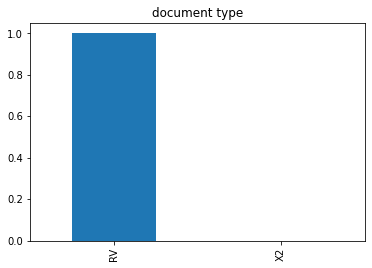

In [ ]:
train['document type'].value_counts(normalize=True).plot(kind = 'bar', title = "document type")

# We can clearly see through the graph that 99 percent of the data in document type is RV.So it is approriate to drop this column

#### So we have to drop 5 columns from our datasets.

* posting id (all constant values)
* area_business (all null values)
* document_create_date (as we are getting 2 columns of document_create_date)
* invoice_id (since it has same values as that of doc_id , dropping this column won't make much changes instead of null imputation)
* document type (99 % of the data is constant)

In [ ]:
train.drop(labels =['posting_id', 'area_business','document_create_date','invoice_id','document type'], axis = 1,inplace=True)
val1.drop(labels = ['posting_id', 'area_business','document_create_date','invoice_id','document type'], axis = 1,inplace=True)
local_test.drop(labels =['posting_id', 'area_business','document_create_date','invoice_id','document type'], axis = 1,inplace=True)
Test.drop(labels =['posting_id', 'area_business','document_create_date','invoice_id','document type'], axis = 1,inplace=True)
#customer_name and buisness_year

In [ ]:
len(train.columns)

15

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Target_days
27305,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,8494.34,2018-12-30,NAH4,0,1
25048,U001,0200780383,MEIJ foundation,2019-01-18,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,USD,80237.74,2018-12-30,NAA8,0,4
19368,U001,0200711029,WEGMAN foundation,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,16626.31,2018-12-30,NAA8,0,0
42391,U001,0200799538,UNITE llc,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,97366.37,2018-12-30,NAA8,0,1
39761,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,8406.56,2018-12-30,NAH4,0,-5


# Exploratory Data Analysis

In [ ]:
train.columns

# Let us start with the names of the features

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'isOpen', 'Target_days'],
      dtype='object')

Let's see the behaviour of our Target_days(delay in payment) 

In [ ]:
train['Target_days'].describe()

count    31938.000000
mean         1.022512
std         11.451619
min        -83.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        238.000000
Name: Target_days, dtype: float64

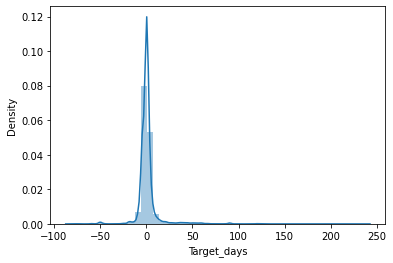

In [ ]:
g = sns.distplot(train['Target_days'])

Okay so through this we can say that our we can handle our Target_days (DELAY) into more appropriate Gaussian Distribution through Log or sqrt transformation in Feature Engineering.

## Analysing Categorical Features

In [ ]:
x = train.describe(include="O")
x

,business_code,cust_number,name_customer,invoice_currency,cust_payment_terms
count,31938,31938,31938,31938,31938
unique,6,1290,3631,2,64
top,U001,0200769623,WAL-MAR llc,USD,NAA8
freq,28916,6873,725,29465,12600


In [ ]:
x.columns

Index(['business_code', 'cust_number', 'name_customer', 'invoice_currency',
       'cust_payment_terms'],
      dtype='object')

<AxesSubplot:title={'center':'invoice_currency'}>

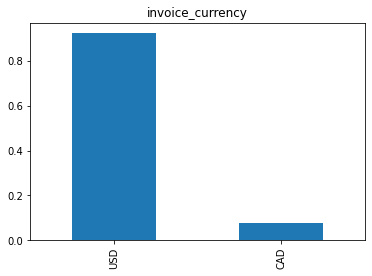

In [ ]:
train.invoice_currency.value_counts(normalize=True).plot(kind = 'bar', title = "invoice_currency")

Okay so we have two invoice_currency where most of them are in USD which we can clearly see through the bar graph.

<AxesSubplot:title={'center':'business_code'}>

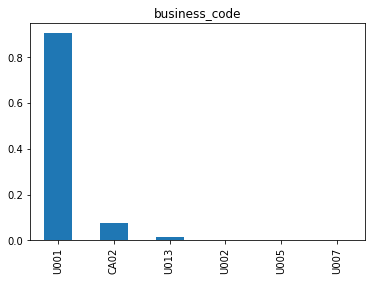

In [ ]:
train.business_code.value_counts(normalize=True).plot(kind = 'bar', title = "business_code")

So we can say that we have most of our datasets from Buisness Code U001.

## Numerical Variables

In [ ]:
num_cols = train._get_numeric_data().columns
num_cols

Index(['buisness_year', 'doc_id', 'total_open_amount', 'isOpen',
       'Target_days'],
      dtype='object')

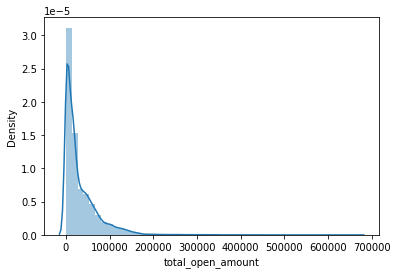

In [ ]:
g = sns.distplot(train['total_open_amount'])   # We have to apply some transformation to remove skewness.We will do this in Fearure Engineering.

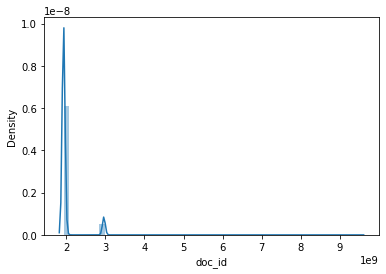

In [ ]:
g = sns.distplot(train['doc_id'])


#### Multivariate Analysis

In [ ]:
#sns.pairplot(train)

Not getting any essential information from here.We will have more detailed Multivariate Analysis while working on Correlation

## Outliers

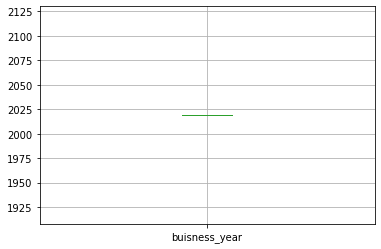

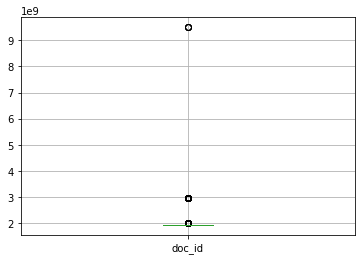

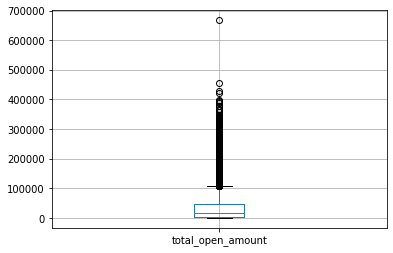

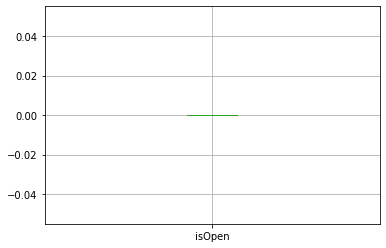

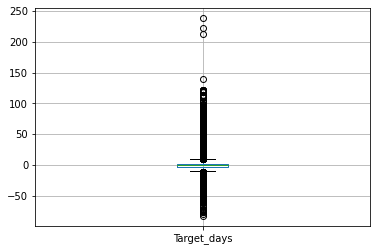

In [ ]:
# Outliers are checked for Numerical columns. So here's graphical representation of outliers using boxplot.
train_copy = train.copy()
for feature in num_cols:
    train_copy[feature] = (train_copy[feature])
    train_copy.boxplot(column=feature)
    plt.titile = feature
    plt.show()

### Handling Outliers

In [ ]:
upper_lim = train['doc_id'].quantile(.95)
lower_lim = train['doc_id'].quantile(.05)
train = train[(train['doc_id'] < upper_lim) & (train['doc_id'] > lower_lim)]

<AxesSubplot:>

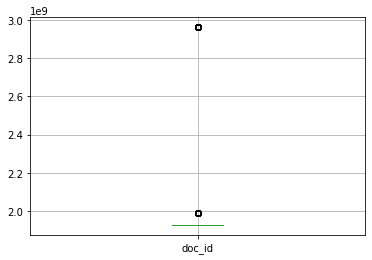

In [ ]:
train.boxplot(column=['doc_id'])

<AxesSubplot:>

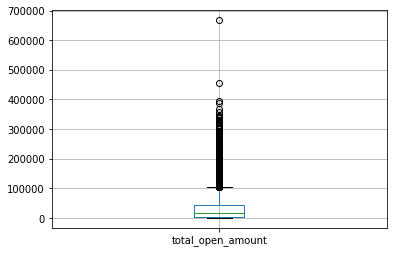

In [ ]:
train.boxplot(column=['total_open_amount'])

<AxesSubplot:>

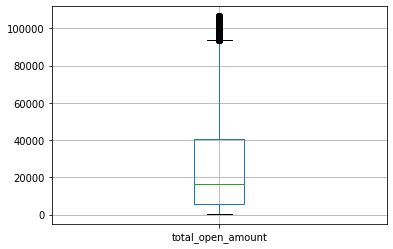

In [ ]:
upper_lim = train['total_open_amount'].quantile(.95)
lower_lim = train['total_open_amount'].quantile(.05)
train = train[(train['total_open_amount'] < upper_lim) & (train['total_open_amount'] > lower_lim)]
train.boxplot(column=['total_open_amount'])

# Feature Engineering

In [ ]:
train.shape

(25868, 15)

In [ ]:
train[train['due_in_date']<train['document_create_date.1']].shape

(87, 15)

#### Dropping all rows where due_in_date is less than document_create_date because these are errors or noise in the dataset.

In [ ]:
train = train[train['due_in_date']>=train['document_create_date.1']]
val1 = val1[val1['due_in_date']>=val1['document_create_date.1']]
local_test = local_test[local_test['due_in_date']>=local_test['document_create_date.1']]
Test = Test[Test['due_in_date']>=Test['document_create_date.1']]

In [ ]:
train.shape

(25781, 15)

### Converting Categorical Variables to Numeric form using Encoding techniques.

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Target_days
12094,U002,0200501669,WAL MA in,2019-02-14,2019.0,1.990563e+09,2018-12-30,2018-12-30,2019-02-03,USD,16416.00,2018-12-30,NAG2,0,11
12464,CA02,0140106271,LONGO,2019-01-16,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,CAD,52525.82,2019-01-02,CA10,0,4
33048,CA02,0140104429,COSTCO,2019-01-18,2019.0,2.960520e+09,2018-12-31,2018-12-31,2019-01-13,CAD,80827.93,2019-01-03,CA10,0,5
41158,U013,CC7470,ALIMENTO corp,2019-05-24,2019.0,1.991820e+09,2018-12-31,2018-12-31,2019-02-14,USD,18409.73,2018-12-31,NAVF,0,99
8045,U002,0100036009,JOSE us,2019-02-12,2019.0,1.990563e+09,2018-12-31,2018-12-31,2019-02-04,USD,29841.11,2018-12-31,NAG2,0,8


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
train["business_code"]  = label_encoder.fit_transform(train[['business_code']])
val1["business_code"]  = label_encoder.fit_transform(val1[['business_code']])
local_test["business_code"]  = label_encoder.fit_transform(local_test[['business_code']])
Test["business_code"]  = label_encoder.fit_transform(Test[['business_code']])

# business_code is label encoded and cust_payment_terms is Target encoded.


from category_encoders import TargetEncoder
targ_enc = TargetEncoder(cols=['cust_payment_terms'], smoothing=8, min_samples_leaf=5).fit(train['cust_payment_terms'], train['Target_days'])

In [ ]:
values = targ_enc.transform(train['cust_payment_terms'].reset_index(drop=True))

In [ ]:
map_values = list(values['cust_payment_terms'])
map_keys = list(train['cust_payment_terms'])

In [ ]:
res = dict(zip(map_keys, map_values)) 
res

{'NAG2': 8.673076923076923,
 'CA10': 6.314074074074074,
 'NAVF': 19.695906414244575,
 'NAVE': 1.0641711229454272,
 'NA38': 5.5959553685054155,
 'NAA8': 1.3106462384600275,
 'NAUP': 1.6147986301773962,
 'NAUZ': 2.5421206224554647,
 'CA30': -0.7663415618138749,
 'NAH4': -1.8909497500657722,
 'NA10': 2.452107279693464,
 'NA32': -3.7213822894168467,
 'NAC6': 0.5944055944055944,
 'NA3B': -6.543184544912941,
 'NAD5': 10.985849056544172,
 'NAAX': 0.09918478260869565,
 'NA9X': -3.8890045401969635,
 'NAAW': -14.965200675558037,
 'NAU5': 1.5808966861598441,
 'NAD1': 0.690671031096563,
 'NAM4': -7.3311688311688314,
 'NAM1': 2.108902176653892,
 'NAVQ': 4.6379787785534035,
 'NAX2': 44.014925373134325,
 'NAWP': -7.628161198334424,
 'BR56': 1.2420134238768237,
 'NAM2': -1.0437710437710432,
 'NACB': 8.113208034496669,
 'C106': 1.3668380865950107,
 'NAB1': 6.570391106354425,
 'NAWM': 0.690586090531787,
 'NAVM': 4.786696150833039,
 'NAGD': -13.502824858757062,
 'NABG': -1.5555446888053757,
 'NA3F': 5.98

In [ ]:
# cust_number is also target encoded.
targ_enc = TargetEncoder(cols=['cust_number'], smoothing=8, min_samples_leaf=5).fit(train['cust_number'], train['Target_days'])

In [ ]:
values1 = targ_enc.transform(train['cust_number'].reset_index(drop=True))

In [ ]:
map_values1 = list(values1['cust_number'])
map_keys1 = list(train['cust_number'])

In [ ]:
res1 = dict(zip(map_keys1, map_values1)) 
res1

{'0200501669': 5.258795768668979,
 '0140106271': 1.0202874103199429,
 '0140104429': 2.492783994663319,
 'CC7470': 0.690586090531787,
 '0100036009': 2.0452930452658933,
 '0140104409': 2.5488102976723868,
 '0100034330': 1.552501094840219,
 '0200825136': 5.040699611776522,
 '0140106408': 11.441118178533138,
 '0140105686': 5.694231709034286,
 '140106181': 25.745293045265893,
 '0140105785': 4.484880377547522,
 '0140104440': 5.7969321558229785,
 '0140104423': 1.468770832350363,
 '0140103335': -2.437205919016714,
 '0140106316': 0.40928731025104753,
 '0200704045': 0.5978278424533406,
 '0140105847': 3.586617109998499,
 '0100046479': -1.9771073287191963,
 '0140105508': -0.6090461898637782,
 '0140103435': 5.2042897621917845,
 'CCU001': 8.958430148326027,
 '0100010183': 0.690586090531787,
 '0140103480': 0.2625101740035153,
 '0140104240': -1.0711803917784435,
 '0140101584': 1.1054641055759356,
 '0140106343': 0.015252834442339824,
 '0140103423': -0.7386784606277483,
 '0140104472': 3.8359822372812107

In [ ]:
train['cust_payment_terms'] = train['cust_payment_terms'].map(res)
val1['cust_payment_terms'] = val1['cust_payment_terms'].map(res)
local_test['cust_payment_terms'] = local_test['cust_payment_terms'].map(res)
Test['cust_payment_terms'] =Test['cust_payment_terms'].map(res)

train['cust_number'] = train['cust_number'].map(res1)
val1['cust_number'] = val1['cust_number'].map(res1)
local_test['cust_number'] = local_test['cust_number'].map(res1)
Test['cust_number'] =Test['cust_number'].map(res1)


# Mapping the encoded columns

In [ ]:
train["business_code"].unique()

array([2, 0, 5, 1, 3, 4])

In [ ]:
train["cust_number"].unique()

array([ 5.25879577e+00,  1.02028741e+00,  2.49278399e+00,  6.90586091e-01,
        2.04529305e+00,  2.54881030e+00,  1.55250109e+00,  5.04069961e+00,
        1.14411182e+01,  5.69423171e+00,  2.57452930e+01,  4.48488038e+00,
        5.79693216e+00,  1.46877083e+00, -2.43720592e+00,  4.09287310e-01,
        5.97827842e-01,  3.58661711e+00, -1.97710733e+00, -6.09046190e-01,
        5.20428976e+00,  8.95843015e+00,  2.62510174e-01, -1.07118039e+00,
        1.10546411e+00,  1.52528344e-02, -7.38678461e-01,  3.83598224e+00,
        2.38935386e+01,  2.55106082e+00,  4.34908888e+01,  3.89081926e+00,
        3.97338983e+00, -2.19142479e-01, -1.03952608e+00,  8.90740741e-01,
       -3.30085986e+00,  6.12954010e-01,  2.81298780e-01,  2.85328771e+00,
       -2.07469087e-01,  1.85475520e+01,  1.24529305e+00, -5.44941538e+00,
        3.44330098e+01,  2.12295327e+00,  1.99358410e+00,  1.22395411e+00,
       -2.24527387e+00,  1.70170177e+00, -1.94682739e+00,  3.84844934e+00,
       -1.51684447e-01, -

In [ ]:
Test = Test[Test['cust_payment_terms'].notna()]
local_test = local_test[local_test['cust_payment_terms'].notna()]
val = val[val['cust_payment_terms'].notna()]

Test = Test[Test['cust_number'].notna()]
local_test = local_test[local_test['cust_number'].notna()]
val = val[val['cust_number'].notna()]

In [ ]:
train['cust_payment_terms'].unique()

array([ 8.67307692e+00,  6.31407407e+00,  1.96959064e+01,  1.06417112e+00,
        5.59595537e+00,  1.31064624e+00,  1.61479863e+00,  2.54212062e+00,
       -7.66341562e-01, -1.89094975e+00,  2.45210728e+00, -3.72138229e+00,
        5.94405594e-01, -6.54318454e+00,  1.09858491e+01,  9.91847826e-02,
       -3.88900454e+00, -1.49652007e+01,  1.58089669e+00,  6.90671031e-01,
       -7.33116883e+00,  2.10890218e+00,  4.63797878e+00,  4.40149254e+01,
       -7.62816120e+00,  1.24201342e+00, -1.04377104e+00,  8.11320803e+00,
        1.36683809e+00,  6.57039111e+00,  6.90586091e-01,  4.78669615e+00,
       -1.35028249e+01, -1.55554469e+00,  5.98571480e+00,  2.44529305e+00,
       -5.56034298e+00,  2.85328771e+00,  1.21780178e+00,  3.82665747e-01,
        2.85548764e+01,  8.26054771e-01,  5.34172438e-01,  1.26387827e+00,
       -2.42343834e+01, -1.35470695e+00, -9.15363504e+00, -9.08283054e+00,
        1.95391021e-03,  8.35636431e-01,  8.55595531e+00,  8.16620710e-01,
       -6.81653941e+00])

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Target_days
12094,2,5.258796,WAL MA in,2019-02-14,2019.0,1.990563e+09,2018-12-30,2018-12-30,2019-02-03,USD,16416.00,2018-12-30,8.673077,0,11
12464,0,1.020287,LONGO,2019-01-16,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,CAD,52525.82,2019-01-02,6.314074,0,4
33048,0,2.492784,COSTCO,2019-01-18,2019.0,2.960520e+09,2018-12-31,2018-12-31,2019-01-13,CAD,80827.93,2019-01-03,6.314074,0,5
41158,5,0.690586,ALIMENTO corp,2019-05-24,2019.0,1.991820e+09,2018-12-31,2018-12-31,2019-02-14,USD,18409.73,2018-12-31,19.695906,0,99
8045,2,2.045293,JOSE us,2019-02-12,2019.0,1.990563e+09,2018-12-31,2018-12-31,2019-02-04,USD,29841.11,2018-12-31,8.673077,0,8


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25781 entries, 12094 to 20570
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           25781 non-null  int32         
 1   cust_number             25781 non-null  float64       
 2   name_customer           25781 non-null  object        
 3   clear_date              25781 non-null  datetime64[ns]
 4   buisness_year           25781 non-null  float64       
 5   doc_id                  25781 non-null  float64       
 6   posting_date            25781 non-null  datetime64[ns]
 7   document_create_date.1  25781 non-null  datetime64[ns]
 8   due_in_date             25781 non-null  datetime64[ns]
 9   invoice_currency        25781 non-null  object        
 10  total_open_amount       25781 non-null  float64       
 11  baseline_create_date    25781 non-null  datetime64[ns]
 12  cust_payment_terms      25781 non-null  fl

In [ ]:
train['buisness_year']=train['buisness_year'].astype(int)     # Changing float to int.

In [ ]:
train["business_code"].unique()

array([2, 0, 5, 1, 3, 4])

### Now the Remaining Categorical Variables are:

In [ ]:
o = train.describe(include="O")
o

,name_customer,invoice_currency
count,25781,25781
unique,3234,2
top,WAL-MAR llc,USD
freq,656,25078


### Converting invoice_currency from CAD to USD

In [ ]:
train["invoice_currency"].unique()

array(['USD', 'CAD'], dtype=object)

In [ ]:
train.loc[train.invoice_currency == "CAD", "total_open_amount"] = (train["total_open_amount"]*.78)
train.loc[train.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [ ]:
val1.loc[val1.invoice_currency == "CAD", "total_open_amount"] = (val1["total_open_amount"]*.78)
val1.loc[val1.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [ ]:
local_test.loc[local_test.invoice_currency == "CAD", "total_open_amount"] = (local_test["total_open_amount"]*.78)
local_test.loc[local_test.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [ ]:
Test.loc[Test.invoice_currency == "CAD", "total_open_amount"] = (Test["total_open_amount"]*.78)
Test.loc[Test.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [ ]:
train.loc[train.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [ ]:
train["invoice_currency"].unique()

array(['USD'], dtype=object)

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Target_days
12094,2,5.258796,WAL MA in,2019-02-14,2019,1.990563e+09,2018-12-30,2018-12-30,2019-02-03,USD,16416.0000,2018-12-30,8.673077,0,11
12464,0,1.020287,LONGO,2019-01-16,2019,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,USD,40970.1396,2019-01-02,6.314074,0,4
33048,0,2.492784,COSTCO,2019-01-18,2019,2.960520e+09,2018-12-31,2018-12-31,2019-01-13,USD,63045.7854,2019-01-03,6.314074,0,5
41158,5,0.690586,ALIMENTO corp,2019-05-24,2019,1.991820e+09,2018-12-31,2018-12-31,2019-02-14,USD,18409.7300,2018-12-31,19.695906,0,99
8045,2,2.045293,JOSE us,2019-02-12,2019,1.990563e+09,2018-12-31,2018-12-31,2019-02-04,USD,29841.1100,2018-12-31,8.673077,0,8


Now invoice_currency is of no use.We will remove it in Feature Selection.

## Making features out of date.

In [ ]:
## Extracting useful info from due_date column for ML model to understand
train['day_of_due'] =  train['due_in_date'].dt.day
train['month_of_due'] =  train['due_in_date'].dt.month
train['year_of_due'] =  train['due_in_date'].dt.year
train['weekday_of_due'] =  train['due_in_date'].dt.quarter
train['quarter_of_due'] =  train['due_in_date'].dt.quarter

# Mapping same changes on validation set
val1['day_of_due'] =  val1['due_in_date'].dt.day
val1['month_of_due'] =  val1['due_in_date'].dt.month
val1['year_of_due'] =  val1['due_in_date'].dt.year
val1['weekday_of_due'] =  val1['due_in_date'].dt.quarter
val1['quarter_of_due'] =  val1['due_in_date'].dt.quarter


# Mapping same changes on local_test set
local_test['day_of_due'] =  local_test['due_in_date'].dt.day
local_test['month_of_due'] =  local_test['due_in_date'].dt.month
local_test['year_of_due'] =  local_test['due_in_date'].dt.year
local_test['weekday_of_due'] =  local_test['due_in_date'].dt.quarter
local_test['quarter_of_due'] =  local_test['due_in_date'].dt.quarter

# Mapping same changes on test set
Test['day_of_due'] =  Test['due_in_date'].dt.day
Test['month_of_due'] =  Test['due_in_date'].dt.month
Test['year_of_due'] =  Test['due_in_date'].dt.year
Test['weekday_of_due'] =  Test['due_in_date'].dt.quarter
Test['quarter_of_due'] =  Test['due_in_date'].dt.quarter

In [ ]:
## Extracting useful info from document_create_date.1 column for ML model to understand
train['day_document_creation'] =  train['document_create_date.1'].dt.day
train['month_of_document_creation'] =  train['document_create_date.1'].dt.month
train['year_of_document_creation'] =  train['document_create_date.1'].dt.year
train['weekday_of_document_creation'] =  train['document_create_date.1'].dt.dayofweek
train['quarter_of_document_creation'] =  train['document_create_date.1'].dt.quarter


# Mapping same changes on local_test set
local_test['day_document_creation'] =  local_test['document_create_date.1'].dt.day
local_test['month_of_document_creation'] =  local_test['document_create_date.1'].dt.month
local_test['year_of_document_creation'] =  local_test['document_create_date.1'].dt.year
local_test['weekday_of_document_creation'] =  local_test['document_create_date.1'].dt.dayofweek
local_test['quarter_of_document_creation'] =  local_test['document_create_date.1'].dt.quarter

# Mapping same changes on validation set
val1['day_document_creation'] =  val1['document_create_date.1'].dt.day
val1['month_of_document_creation'] =  val1['document_create_date.1'].dt.month
val1['year_of_document_creation'] =  val1['document_create_date.1'].dt.year
val1['weekday_of_document_creation'] =  val1['document_create_date.1'].dt.dayofweek
val1['quarter_of_document_creation'] =  val1['document_create_date.1'].dt.quarter

# Mapping same changes on test set
Test['day_document_creation'] =  Test['document_create_date.1'].dt.day
Test['month_of_document_creation'] =  Test['document_create_date.1'].dt.month
Test['year_of_document_creation'] =  Test['document_create_date.1'].dt.year
Test['weekday_of_document_creation'] =  Test['document_create_date.1'].dt.dayofweek
Test['quarter_of_document_creation'] =  Test['document_create_date.1'].dt.quarter

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,day_of_due,month_of_due,year_of_due,weekday_of_due,quarter_of_due,day_document_creation,month_of_document_creation,year_of_document_creation,weekday_of_document_creation,quarter_of_document_creation
12094,2,5.258796,WAL MA in,2019-02-14,2019,1.990563e+09,2018-12-30,2018-12-30,2019-02-03,USD,...,3,2,2019,1,1,30,12,2018,6,4
12464,0,1.020287,LONGO,2019-01-16,2019,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,USD,...,12,1,2019,1,1,30,12,2018,6,4
33048,0,2.492784,COSTCO,2019-01-18,2019,2.960520e+09,2018-12-31,2018-12-31,2019-01-13,USD,...,13,1,2019,1,1,31,12,2018,0,4
41158,5,0.690586,ALIMENTO corp,2019-05-24,2019,1.991820e+09,2018-12-31,2018-12-31,2019-02-14,USD,...,14,2,2019,1,1,31,12,2018,0,4
8045,2,2.045293,JOSE us,2019-02-12,2019,1.990563e+09,2018-12-31,2018-12-31,2019-02-04,USD,...,4,2,2019,1,1,31,12,2018,0,4


In [ ]:
train.shape

(25781, 25)

# Feature Selection

### Since the number of features are not very big we can handle the features manually through Filter method.

#### Correlation of features:

In [ ]:
correlation_matrix = train.corr()
correlated_features = set()
correlation_matrix

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,isOpen,Target_days,day_of_due,month_of_due,year_of_due,weekday_of_due,quarter_of_due,day_document_creation,month_of_document_creation,year_of_document_creation,weekday_of_document_creation,quarter_of_document_creation
business_code,1.000000,0.078410,NaN,-0.274981,-0.024044,0.116799,NaN,0.072404,0.002368,0.092038,NaN,0.086495,0.086495,0.003623,0.056898,-0.012866,0.008089,0.056737
cust_number,0.078410,1.000000,NaN,0.124534,-0.037768,0.834819,NaN,0.641118,0.001049,-0.031570,NaN,-0.030634,-0.030634,0.004585,-0.023805,-0.003917,-0.005573,-0.020014
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.274981,0.124534,NaN,1.000000,-0.002737,0.146395,NaN,0.088828,-0.015890,-0.199394,NaN,-0.178083,-0.178083,-0.014387,-0.190032,-0.047002,-0.016318,-0.179003
total_open_amount,-0.024044,-0.037768,NaN,-0.002737,1.000000,0.023912,NaN,-0.007414,-0.010148,-0.009250,NaN,-0.007015,-0.007015,0.016212,-0.002813,-0.002238,-0.009689,-0.005431
cust_payment_terms,0.116799,0.834819,NaN,0.146395,0.023912,1.000000,NaN,0.604474,-0.003109,-0.065261,NaN,-0.061077,-0.061077,0.010467,-0.020134,-0.019571,-0.006655,-0.015169
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target_days,0.072404,0.641118,NaN,0.088828,-0.007414,0.604474,NaN,1.000000,-0.014976,-0.048383,NaN,-0.044968,-0.044968,-0.010412,-0.019062,-0.029696,0.004510,-0.016020
day_of_due,0.002368,0.001049,NaN,-0.015890,-0.010148,-0.003109,NaN,-0.014976,1.000000,-0.076215,NaN,-0.082929,-0.082929,-0.357906,0.076085,0.010922,0.003354,0.062213
month_of_due,0.092038,-0.031570,NaN,-0.199394,-0.009250,-0.065261,NaN,-0.048383,-0.076215,1.000000,NaN,0.955094,0.955094,0.028396,0.969008,0.026719,0.001476,0.919735


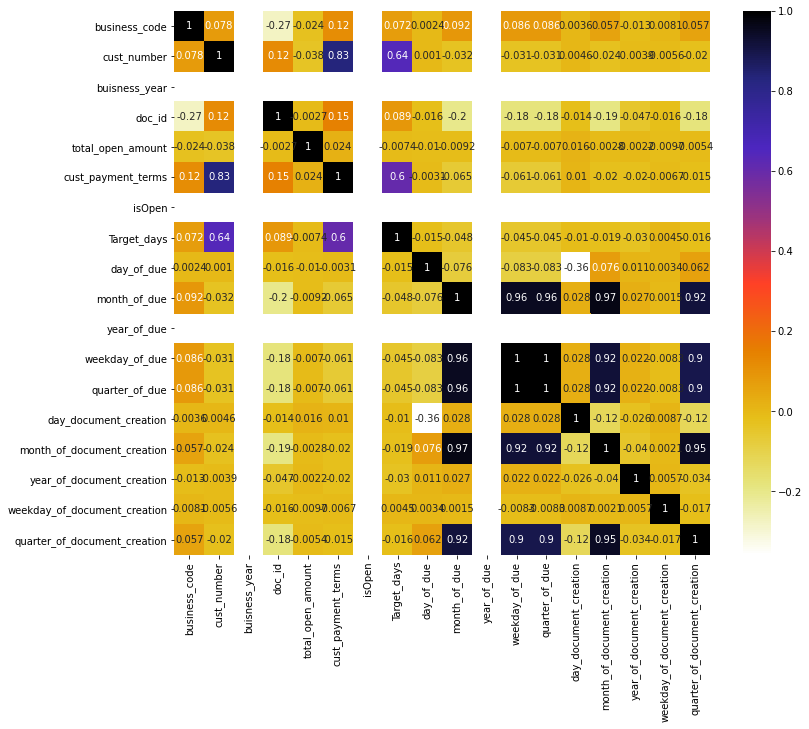

In [ ]:
#Heatmap Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Extracting all correlated independent variables so that we can drop the.

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
print(correlated_features)  # Indepent correlated features

{'month_of_document_creation', 'quarter_of_document_creation', 'weekday_of_due', 'quarter_of_due'}


Dropping all independent correlated features:

In [ ]:
train.drop(labels=correlated_features, axis=1, inplace=True)
val1.drop(labels=correlated_features, axis=1, inplace=True)
local_test.drop(labels=correlated_features, axis=1, inplace=True)
Test.drop(labels=correlated_features, axis=1, inplace=True)

### Checking for Quasi Constant

In [ ]:
num_col = train._get_numeric_data().columns
num_col
# Extracting all numerical features

Index(['business_code', 'cust_number', 'buisness_year', 'doc_id',
       'total_open_amount', 'cust_payment_terms', 'isOpen', 'Target_days',
       'day_of_due', 'month_of_due', 'year_of_due', 'day_document_creation',
       'year_of_document_creation', 'weekday_of_document_creation'],
      dtype='object')

In [ ]:
train_copy = train[num_col]
train_copy.head()

,business_code,cust_number,buisness_year,doc_id,total_open_amount,cust_payment_terms,isOpen,Target_days,day_of_due,month_of_due,year_of_due,day_document_creation,year_of_document_creation,weekday_of_document_creation
12094,2,5.258796,2019,1.990563e+09,16416.0000,8.673077,0,11,3,2,2019,30,2018,6
12464,0,1.020287,2019,2.960521e+09,40970.1396,6.314074,0,4,12,1,2019,30,2018,6
33048,0,2.492784,2019,2.960520e+09,63045.7854,6.314074,0,5,13,1,2019,31,2018,0
41158,5,0.690586,2019,1.991820e+09,18409.7300,19.695906,0,99,14,2,2019,31,2018,0
8045,2,2.045293,2019,1.990563e+09,29841.1100,8.673077,0,8,4,2,2019,31,2018,0


In [ ]:
train.shape

(25781, 21)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vts = VarianceThreshold(threshold=0.1)

In [ ]:
vts.fit(train_copy)

VarianceThreshold(threshold=0.1)

In [ ]:
train_copy.columns[list(vts.get_support())]  # Printing columns which passed quasi constant test.Rest will be dropped.

Index(['business_code', 'cust_number', 'doc_id', 'total_open_amount',
       'cust_payment_terms', 'Target_days', 'day_of_due', 'month_of_due',
       'day_document_creation', 'weekday_of_document_creation'],
      dtype='object')

In [ ]:
train.shape # for checking number of rows.

(25781, 21)

Equality check for posting_date and document_create_date.1.

In [ ]:
a=0
for i in range(25781):
    if((train['posting_date'].iloc[i])==train['document_create_date.1'].iloc[i]):
        a=a+1
print(a)


25781


#### Also, dropping the `name_customer` and `doc_id` column as for generalization, the cust_number is itself enough
#### Dropping the `posting_date` as it is same as `document_create_date` as checked above.
#### Dropping the `invoice_currency` as it is of no use now as we have changed the `total_open_amount` according to its currency 
#### Dropping the `year_of_document_creation` , `year_of_due`  is very low correlated with our target variable.

In [ ]:
train.drop(labels =['posting_date','invoice_currency','name_customer','buisness_year','isOpen','document_create_date.1','due_in_date','doc_id','baseline_create_date','clear_date','year_of_due','year_of_document_creation'], axis = 1,inplace=True)
val1.drop(labels = ['posting_date','invoice_currency','name_customer','buisness_year','isOpen','document_create_date.1','due_in_date','doc_id','baseline_create_date','clear_date','year_of_due','year_of_document_creation'], axis = 1,inplace=True)
local_test.drop(labels =['posting_date','invoice_currency','name_customer','buisness_year','isOpen','document_create_date.1','due_in_date','doc_id','baseline_create_date','clear_date','year_of_due','year_of_document_creation'], axis = 1,inplace=True)
Test.drop(labels =['posting_date','invoice_currency','name_customer','buisness_year','isOpen','document_create_date.1','due_in_date','doc_id','baseline_create_date','year_of_due','year_of_document_creation'], axis = 1,inplace=True)

In [ ]:
train.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,Target_days,day_of_due,month_of_due,day_document_creation,weekday_of_document_creation
12094,2,5.258796,16416.0000,8.673077,11,3,2,30,6
12464,0,1.020287,40970.1396,6.314074,4,12,1,30,6
33048,0,2.492784,63045.7854,6.314074,5,13,1,31,0
41158,5,0.690586,18409.7300,19.695906,99,14,2,31,0
8045,2,2.045293,29841.1100,8.673077,8,4,2,31,0


## Handling Skewness

In [ ]:
train.skew() #before handling skewness

business_code                   6.244061
cust_number                     4.875044
total_open_amount               1.151461
cust_payment_terms              4.045405
Target_days                     3.615198
day_of_due                      0.039864
month_of_due                    0.062007
day_document_creation          -0.033117
weekday_of_document_creation    0.170565
dtype: float64

In [ ]:
from scipy import stats

In [ ]:
train['total_open_amount'] = stats.boxcox(train['total_open_amount'])[0]
train['cust_payment_terms'] = np.log(train['cust_payment_terms'])
train['cust_number'] = np.log(train['cust_number'])
train['Target_days'] = np.sqrt(train['Target_days'])
train['business_code'] = np.sqrt(train['business_code'])

In [ ]:
val1['total_open_amount'] = stats.boxcox(val1['total_open_amount'])[0]
val1['cust_payment_terms'] = np.log(val1['cust_payment_terms'])
val1['cust_number'] = np.log(val1['cust_number'])
val1['Target_days'] = np.sqrt(val1['Target_days'])
val1['business_code'] = np.sqrt(val1['business_code'])

In [ ]:
local_test['total_open_amount'] = stats.boxcox(local_test['total_open_amount'])[0]
local_test['cust_payment_terms'] = np.log(local_test['cust_payment_terms'])
local_test['cust_number'] = np.log(local_test['cust_number'])
local_test['Target_days'] = np.sqrt(local_test['Target_days'])
local_test['business_code'] = np.sqrt(local_test['business_code'])

In [ ]:
Test['total_open_amount'] = stats.boxcox(Test['total_open_amount'])[0]
Test['cust_payment_terms'] = np.log(Test['cust_payment_terms'])
Test['cust_number'] = np.log(Test['cust_number'])
Test['Target_days'] = np.sqrt(Test['Target_days'])
Test['business_code'] = np.sqrt(Test['business_code'])

In [ ]:
train.skew() #after handling skewness

business_code                   0.412485
cust_number                    -0.106822
total_open_amount              -0.121562
cust_payment_terms              0.550214
Target_days                     2.341974
day_of_due                      0.039864
month_of_due                    0.062007
day_document_creation          -0.033117
weekday_of_document_creation    0.170565
dtype: float64

Removing null values if any

In [ ]:
train.dropna(inplace=True)
local_test.dropna(inplace=True)
val1.dropna(inplace=True)

## Standardization :

X_train consist of all independent features of train dataset and Y_train our dependent variable.Same for other sets also.

In [ ]:
X_train = train.drop(labels = ['Target_days'],axis = 1,inplace = False)
Y_train = train['Target_days']

In [ ]:
X_local_test = local_test.drop(labels = ['Target_days'],axis = 1,inplace = False)
Y_local_test = local_test['Target_days']
X_val = val1.drop(labels = ['Target_days'],axis = 1,inplace = False)
Y_val = val1['Target_days']
Test.drop(labels = ['Target_days','clear_date'],axis = 1,inplace = True)

Standardizing only independent features.

In [ ]:
from sklearn import preprocessing
# Getting column names first
names = X_train.columns
# Creating the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting our data on the scaler object
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df, columns=names)

# Same for other sets

In [ ]:
val_names = X_val.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_val)
X_val = pd.DataFrame(scaled_df, columns=val_names)

In [ ]:
local_names =X_local_test.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_local_test)
X_local_test = pd.DataFrame(scaled_df, columns=local_names)

In [ ]:
Test_names =Test.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(Test)
Test = pd.DataFrame(scaled_df, columns=Test_names)

In [ ]:
X_train.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_of_due,month_of_due,day_document_creation,weekday_of_document_creation
0,1.430577,0.966090,-0.101340,1.639941,-1.439418,-1.484491,1.595957,1.989711
1,-3.183412,-0.198947,0.696974,1.306122,-0.397682,-1.873442,1.595957,1.989711
2,-3.183412,0.435725,1.143657,1.306122,-0.281934,-1.873442,1.709182,-1.429401
3,4.111945,-0.476241,-0.011299,2.502438,-0.166186,-1.484491,1.709182,-1.429401
4,1.430577,0.295152,0.398763,1.639941,-1.323670,-1.484491,1.709182,-1.429401


# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
train.isnull().sum()

business_code                   0
cust_number                     0
total_open_amount               0
cust_payment_terms              0
Target_days                     0
day_of_due                      0
month_of_due                    0
day_document_creation           0
weekday_of_document_creation    0
dtype: int64

In [ ]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

## Linear Regression

In [ ]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [ ]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))

## Random Forest Regressor Tree

In [ ]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [ ]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))

## XGBoost Regressor

In [ ]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [ ]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))

## Decision Tree Regressor

In [ ]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [ ]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))

## SVR

In [ ]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [ ]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))

# Model Accuracy

In [ ]:
score = pd.DataFrame(list(zip(Algorithm,MSE_Score,R2_Score)), columns = ['Algorithm' , 'MSE_Score' , 'R2_Score'])
score

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,1.433816,0.385905
1,Random Forest Regressor,1.417261,0.392996
2,XGB Regressor,1.527654,0.345715
3,Decision Tree Regressor,2.909950,-0.246314
4,Support Vector Regression,1.113454,0.523114


Now prediction on actual Test Set

In [ ]:
X_Test = Test

In [ ]:
X_Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_of_due,month_of_due,day_document_creation,weekday_of_document_creation
0,0.235820,NaN,-0.376078,-2.851631,-0.340167,-1.392538,1.284992,0.147586
1,0.235820,NaN,0.383451,NaN,-0.340167,-1.392538,1.284992,0.147586
2,-3.525902,1.313023,1.510343,1.563676,-0.821334,-1.392538,1.284992,0.147586
3,-3.525902,1.313023,0.850809,1.563676,0.140999,-1.392538,1.284992,0.147586
4,0.235820,0.326447,0.043240,-0.107668,-0.340167,-1.392538,1.284992,0.147586


In [ ]:
X_Test.dropna(axis = 0,inplace=True) #dropping null values if any

In [ ]:
X_Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_of_due,month_of_due,day_document_creation,weekday_of_document_creation
2,-3.525902,1.313023,1.510343,1.563676,-0.821334,-1.392538,1.284992,0.147586
3,-3.525902,1.313023,0.850809,1.563676,0.140999,-1.392538,1.284992,0.147586
4,0.235820,0.326447,0.043240,-0.107668,-0.340167,-1.392538,1.284992,0.147586
5,0.235820,0.332859,-0.773433,-0.107668,-0.340167,-1.392538,1.284992,0.147586
9,0.235820,-0.726140,-0.434919,-0.107668,-0.340167,-1.392538,1.284992,0.147586


In [ ]:
#Y_Test = Test['Target_days']

In [ ]:
# Fitting SVR to the Training Set as it gave the best results.
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_Test)

In [ ]:
predicted = [round(num) for num in predicted] # Rounding up the predicted values.
predicted

In [ ]:
max(predicted)

7.0

In [ ]:
X_Test['delay'] = predicted

In [ ]:
Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_of_due,month_of_due,day_document_creation,weekday_of_document_creation,delay
2,-3.525902,1.313023,1.510343,1.563676,-0.821334,-1.392538,1.284992,0.147586,3.0
3,-3.525902,1.313023,0.850809,1.563676,0.140999,-1.392538,1.284992,0.147586,3.0
4,0.235820,0.326447,0.043240,-0.107668,-0.340167,-1.392538,1.284992,0.147586,1.0
5,0.235820,0.332859,-0.773433,-0.107668,-0.340167,-1.392538,1.284992,0.147586,1.0
9,0.235820,-0.726140,-0.434919,-0.107668,-0.340167,-1.392538,1.284992,0.147586,1.0
